In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS

## Parameters

In [33]:
data_folder = "hazelnut"
#subset_name = "good"
#data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
heatmap_thres = 0.7
n_cv_folds = 5

# Data

In [34]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset hazelnut: N Images = 110, Share of anomalies = 0.636


# Model Training

In [35]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

Epoch 1/10: Loss = 0.5375, Accuracy = 0.6000
Epoch 2/10: Loss = 0.4042, Accuracy = 0.6125
Epoch 3/10: Loss = 0.3379, Accuracy = 0.6125
Epoch 4/10: Loss = 0.2359, Accuracy = 0.6250
Epoch 5/10: Loss = 0.1582, Accuracy = 0.7625
Epoch 6/10: Loss = 0.1068, Accuracy = 0.9500
Epoch 7/10: Loss = 0.0492, Accuracy = 1.0000
Early Stopping


In [37]:
model_path = f"weights/First_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

Accuracy: 0.9091
Balanced Accuracy: 0.8750



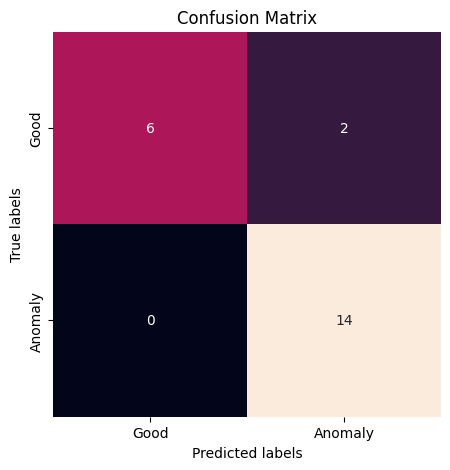

In [38]:
evaluate(model, test_loader, device)

# Cross Validation

Dataset hazelnut: N Images = 110, Share of anomalies = 0.636
Fold 1/5


C:\Users\vikto\AppData\Local\Temp\ipykernel_11716\4243365202.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights

Epoch 1/10: Loss = 0.4860, Accuracy = 0.6250
Epoch 2/10: Loss = 0.3979, Accuracy = 0.6375
Epoch 3/10: Loss = 0.2796, Accuracy = 0.6500
Epoch 4/10: Loss = 0.1999, Accuracy = 0.6750
Epoch 5/10: Loss = 0.1161, Accuracy = 0.9750
Epoch 6/10: Loss = 0.0728, Accuracy = 0.9750
Epoch 7/10: Loss = 0.0264, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0066, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0042, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0018, Accuracy = 1.0000
Accuracy: 0.9545
Balanced Accuracy: 0.9375



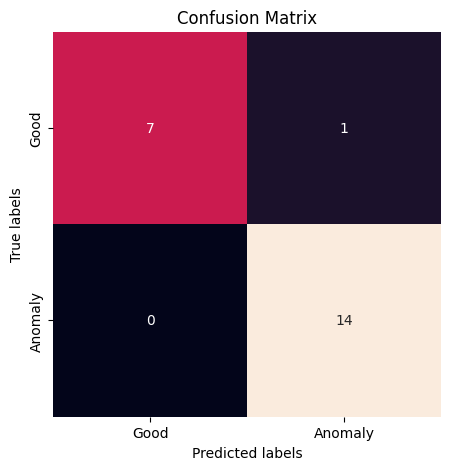

Fold 2/5


c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5260, Accuracy = 0.6250
Epoch 2/10: Loss = 0.3916, Accuracy = 0.6375
Epoch 3/10: Loss = 0.3170, Accuracy = 0.6250
Epoch 4/10: Loss = 0.2347, Accuracy = 0.6500
Epoch 5/10: Loss = 0.1526, Accuracy = 0.9125
Epoch 6/10: Loss = 0.0985, Accuracy = 0.9500
Epoch 7/10: Loss = 0.0443, Accuracy = 0.9875
Epoch 8/10: Loss = 0.0235, Accuracy = 0.9875
Epoch 9/10: Loss = 0.0041, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0041, Accuracy = 1.0000
Accuracy: 1.0000
Balanced Accuracy: 1.0000



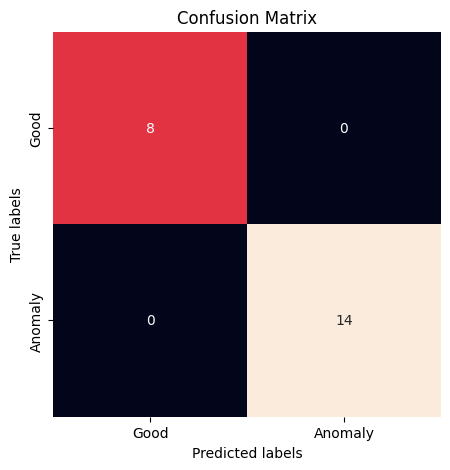

Fold 3/5


c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5376, Accuracy = 0.5750
Epoch 2/10: Loss = 0.3388, Accuracy = 0.6625
Epoch 3/10: Loss = 0.2979, Accuracy = 0.6375
Epoch 4/10: Loss = 0.1999, Accuracy = 0.6500
Epoch 5/10: Loss = 0.1360, Accuracy = 0.7875
Epoch 6/10: Loss = 0.0987, Accuracy = 1.0000
Epoch 7/10: Loss = 0.0343, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0081, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0035, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0009, Accuracy = 1.0000
Accuracy: 0.9545
Balanced Accuracy: 0.9643



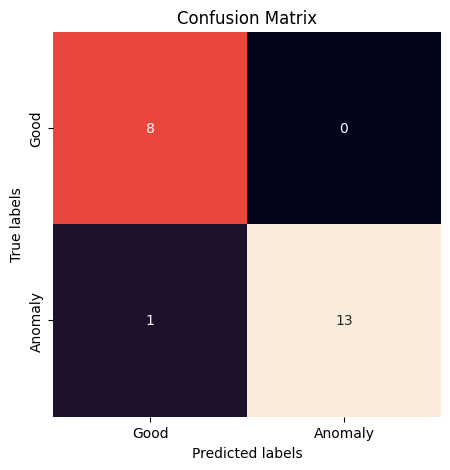

Fold 4/5


c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.4798, Accuracy = 0.6250
Epoch 2/10: Loss = 0.3465, Accuracy = 0.6375
Epoch 3/10: Loss = 0.2747, Accuracy = 0.6250
Epoch 4/10: Loss = 0.1865, Accuracy = 0.7000
Epoch 5/10: Loss = 0.1203, Accuracy = 0.8875
Epoch 6/10: Loss = 0.0679, Accuracy = 1.0000
Epoch 7/10: Loss = 0.0172, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0034, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0008, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0004, Accuracy = 1.0000
Accuracy: 1.0000
Balanced Accuracy: 1.0000



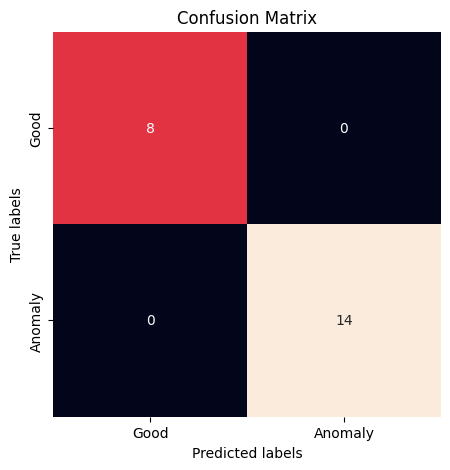

Fold 5/5


c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vikto\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5006, Accuracy = 0.6125
Epoch 2/10: Loss = 0.3780, Accuracy = 0.6375
Epoch 3/10: Loss = 0.2850, Accuracy = 0.6250
Epoch 4/10: Loss = 0.2075, Accuracy = 0.6750
Epoch 5/10: Loss = 0.1537, Accuracy = 0.9625
Epoch 6/10: Loss = 0.0700, Accuracy = 0.9750
Epoch 7/10: Loss = 0.0299, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0067, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0033, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0015, Accuracy = 1.0000
Accuracy: 0.8636
Balanced Accuracy: 0.8929



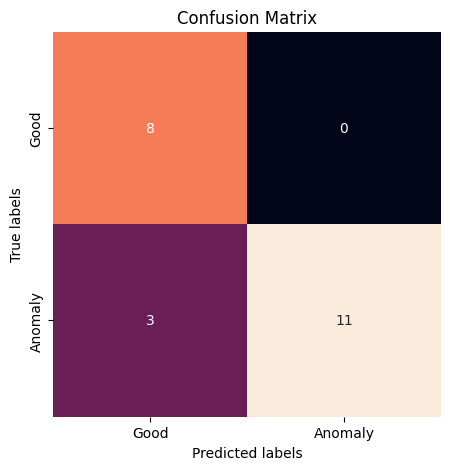

In [39]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    #model = CustomVGG(input_size)
    model = CustomVGG(2)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

# Visualization

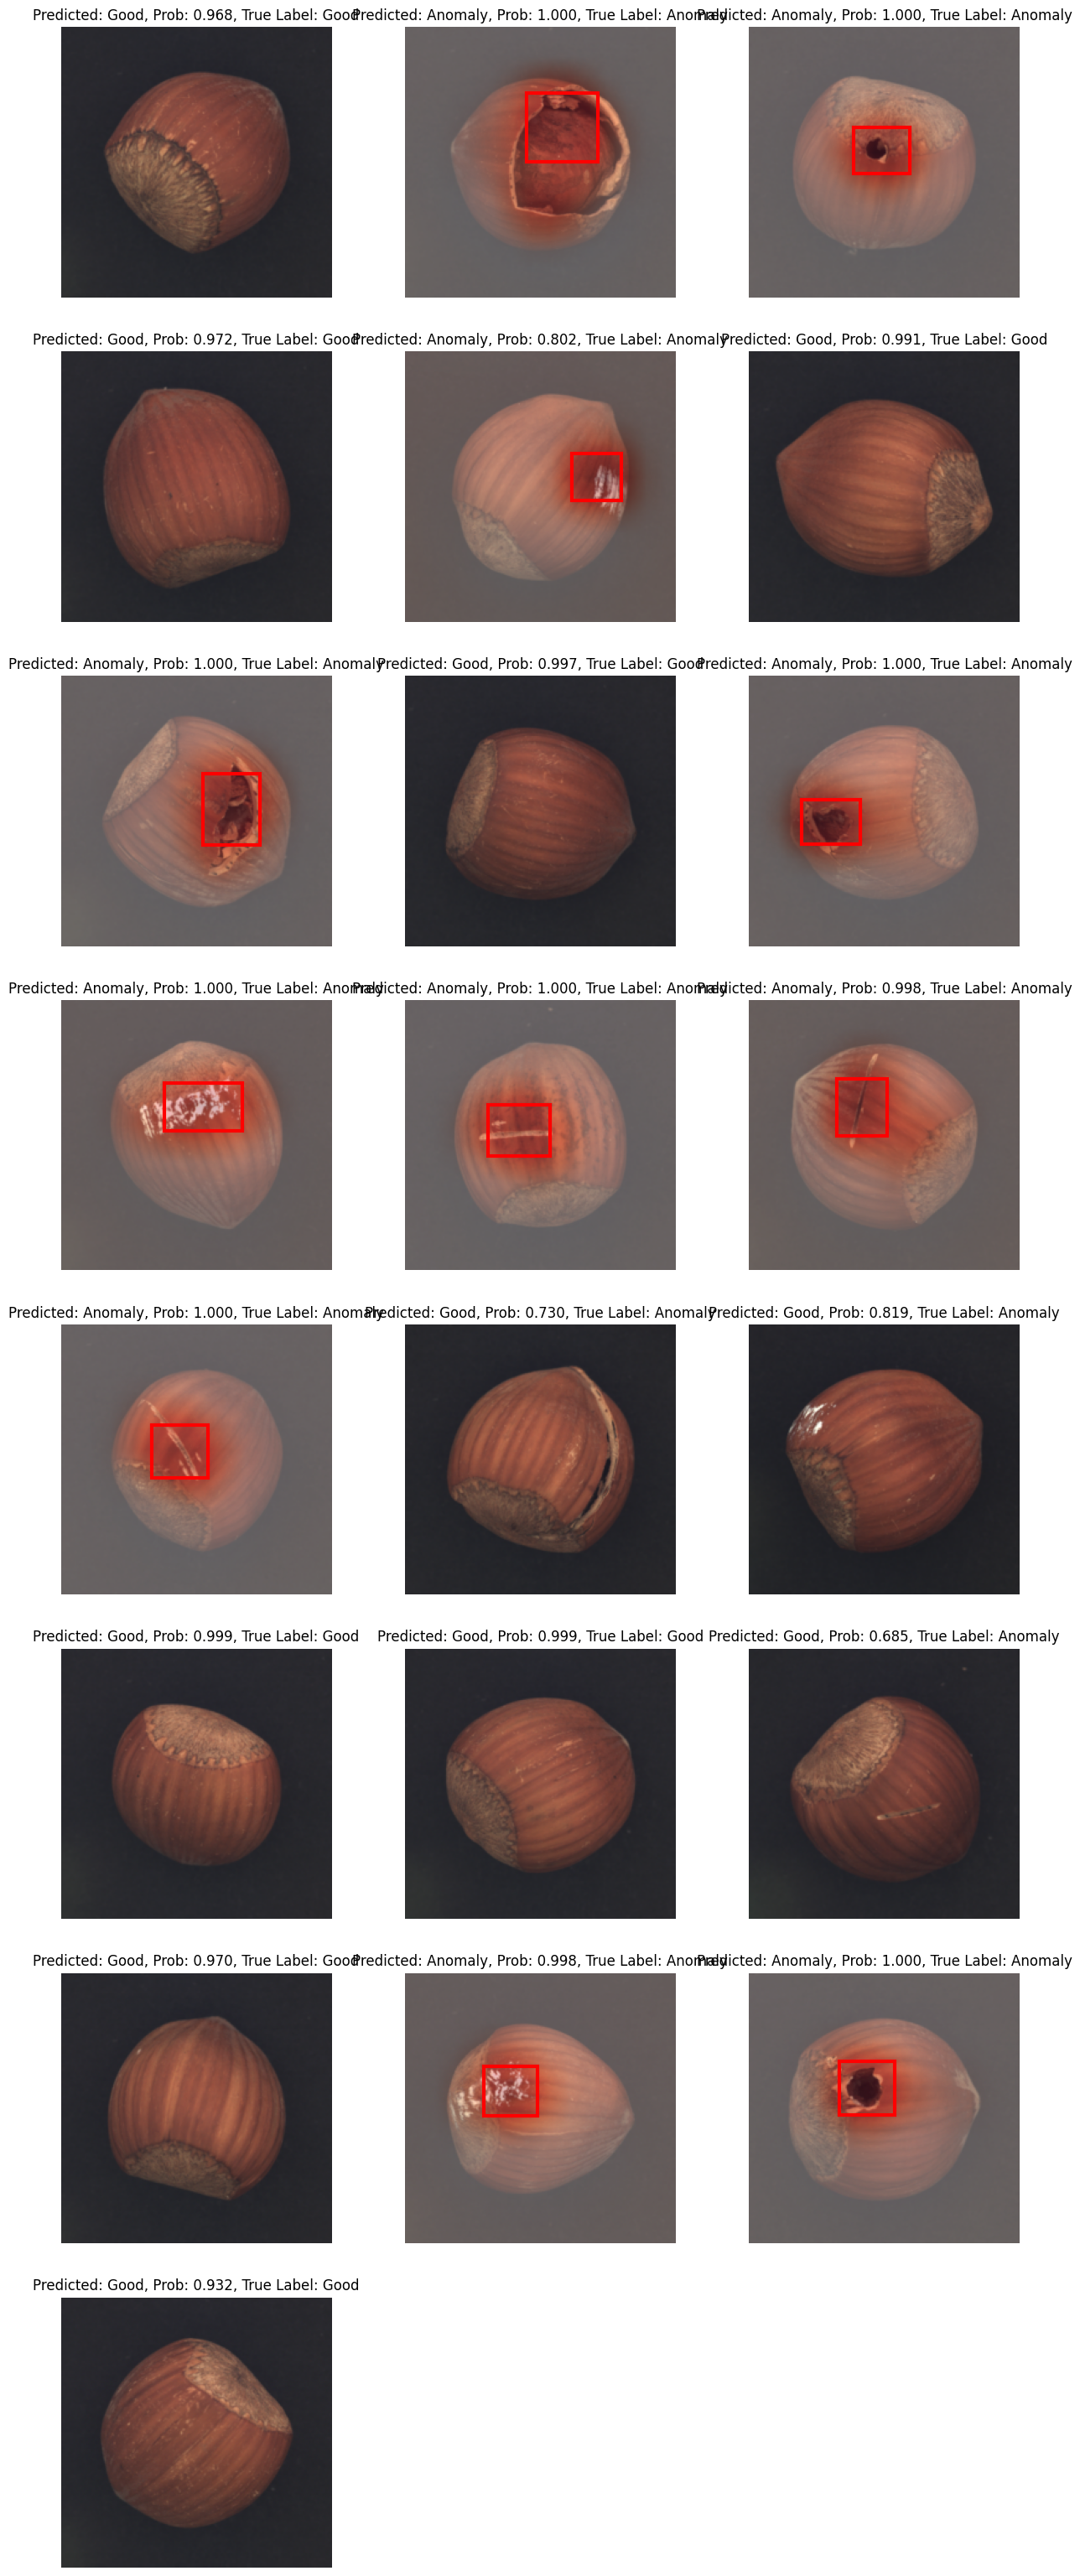

In [40]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=100, show_heatmap=True
)